# Tinkoff

**Банки

## Менеджмент

...

In [2]:
company = 'TCSG'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
dt = pd.read_excel('../tables/tinkoff.xlsx', index_col='Год').T
dt = dt.reset_index().sort_index(ascending=False).rename({'index': 'year'}, axis=1).reset_index().dropna()
n_years = len(dt.index)

In [4]:
dt.head()

Год,index,year,Неоперационная прибыль с вычетом налога,Операционная прибыль,Налог на прибыль,Чистая прибыль,Активы,Капитал,Обязательства,"Налог на прибыль, %",Capex,Количество акций,Цена акции,Капитализация,P/E,P/BV,ROA,ROE,Дивиденды на акцию,"Дивиденды, выплаченные за год"
1,5,2014,2.250000e+08,4.895000e+09,1.494000e+09,3.401000e+09,1.088060e+11,2.096900e+10,8.783700e+10,0.305209,6.930000e+08,179025000.0,179.0,3.204548e+10,9.422368,1.528231,0.031257,0.162192,3.657830,6.548430e+08
2,4,2015,3.580000e+08,2.566000e+09,7.150000e+08,1.851000e+09,1.396520e+11,2.294600e+10,1.167060e+11,0.278644,2.074000e+09,178175000.0,427.0,7.608072e+10,41.102499,3.315642,0.014900,0.080668,0.000000,0.000000e+00
3,3,2016,4.580000e+08,1.456400e+10,3.553000e+09,1.101100e+10,1.753710e+11,2.951800e+10,1.458530e+11,0.243958,3.655000e+09,174508000.0,606.0,1.057518e+11,9.604200,3.582622,0.069906,0.373027,24.222385,4.227000e+09
4,2,2017,8.450000e+08,2.498500e+10,5.962000e+09,1.902300e+10,2.688280e+11,4.194500e+10,2.268830e+11,0.238623,3.446000e+09,176303000.0,1256.0,2.214366e+11,11.640465,5.279212,0.085651,0.453522,45.206264,7.970000e+09
5,1,2018,2.911000e+09,3.522400e+10,8.102000e+09,2.712200e+10,3.754990e+11,4.225000e+10,3.332490e+11,0.230014,4.694000e+09,176425000.0,1355.0,2.390559e+11,8.814095,5.658127,0.084187,0.641941,67.711492,1.194600e+10


## Динамика выручки, капитала, обязательств, активов

In [5]:
dt.columns

Index(['index', 'year', 'Неоперационная прибыль с вычетом налога',
       'Операционная прибыль', 'Налог на прибыль', 'Чистая прибыль', 'Активы',
       'Капитал', 'Обязательства', 'Налог на прибыль, %', 'Capex',
       'Количество акций', 'Цена акции', 'Капитализация', 'P/E', 'P/BV', 'ROA',
       'ROE', 'Дивиденды на акцию', 'Дивиденды, выплаченные за год'],
      dtype='object', name='Год')

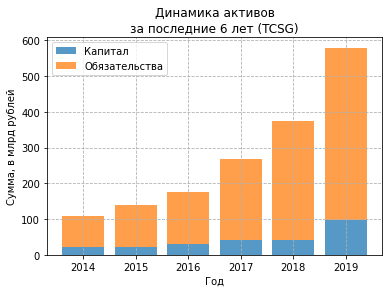

In [8]:
plt.bar(dt.index, dt['Капитал']*1e-9, label='Капитал', alpha=0.75)
plt.bar(dt.index, dt['Обязательства']*1e-9, bottom=dt['Капитал']*1e-9, label='Обязательства', alpha=0.75)
plt.xticks(dt.index, dt.year)
plt.legend()
plt.title(f'Динамика активов\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/assets.png', dpi=200)

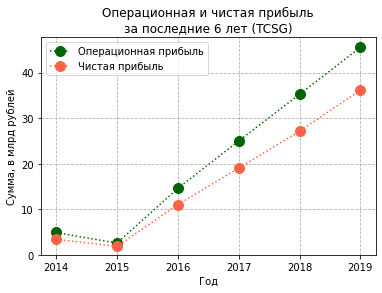

In [9]:
name = "Операционная и чистая прибыль"
plt.plot(dt.index, dt['Операционная прибыль']*1e-9, marker='o', ms=10, 
         label='Операционная прибыль', c='darkgreen', ls=':')
plt.plot(dt.index, dt['Чистая прибыль']*1e-9, marker='o', ms=10, label='Чистая прибыль', c='tomato', ls=':')
plt.xticks(dt.index, dt.year)
plt.legend()
plt.ylim(0, None)
plt.title(f'{name}\nза последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, в млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/net_profit.png', dpi=200)

Чуть выпали в 2019 году из зелёной зоны, но в целом ситуация хорошая

## Дивидендная политика

[Дивиденды](https://www.dohod.ru/ik/analytics/dividend/belu)

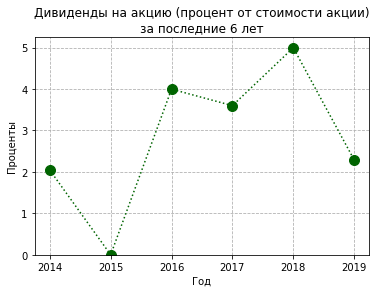

In [5]:
name = "Дивиденды на акцию (процент от стоимости акции)"
data = 100*dt['Дивиденды на акцию']/dt['Цена акции']
plt.xticks(dt.index, dt.year)
plt.plot( dt.index, data, marker='o', ms=10, ls=':', c='darkgreen' )
plt.title(f'{name}\nза последние {len(data.dropna())} лет')#{n_years} лет ({company})')
plt.ylim(0, None)
plt.xlabel('Год')
plt.ylabel('Проценты')
plt.grid(ls='--')
plt.savefig('../images/dividend_share_percent.png', dpi=200)

## ROA

Отвечает на вопрос, выгоднее ли "владельцу" всё продать и положить деньги на депозит?

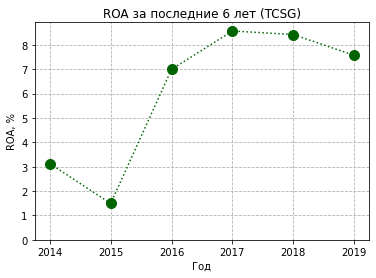

In [6]:
name = "ROA"
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot( dt.index, 100*dt['ROA'], marker='o', ms=10, label=name, c='darkgreen', ls=':')
plt.xticks(dt.index, dt.year)
plt.ylim(0, None)
plt.title(f'{name} за последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel('ROA, %')
plt.grid(ls='--')
plt.savefig('../images/ROA.png', dpi=200)

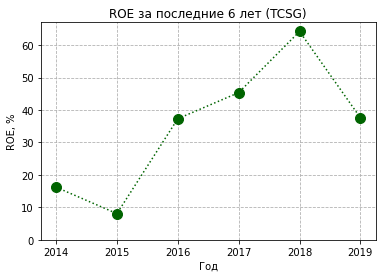

In [7]:
name = "ROE"
plt.xticks(dt.index, dt.index.astype('str'))
plt.plot( dt.index, 100*dt[name], marker='o', ms=10, label=name, c='darkgreen', ls=':')
plt.xticks(dt.index, dt.year)
plt.ylim(0, None)
plt.title(f'{name} за последние {n_years} лет ({company})')
plt.xlabel('Год')
plt.ylabel(f'{name}, %')
plt.grid(ls='--')
plt.savefig(f'../images/{name}.png', dpi=200)

В последние годы всё стало слишком хорошо

## Оценка компании

Теперь, пользуясь мультипликаторами, можно попробовать проверить, недооценена или переоценена компания на бирже

### Капитализация

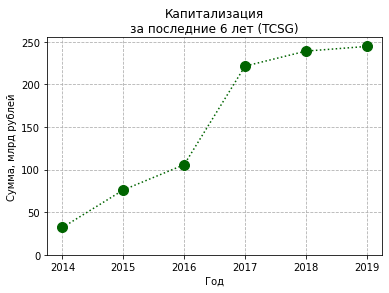

In [8]:
name = "Капитализация"
data = dt['Капитализация']*1e-9
plt.xticks(dt.index, dt.year)
plt.plot( dt.index, data, marker='o', ms=10, label='Капитализация', c='darkgreen', ls=':')
plt.ylim(0, None)
plt.title(f'{name}\nза последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
plt.ylabel('Сумма, млрд рублей')
plt.grid(ls='--')
plt.savefig('../images/capitalization.png', dpi=200)

...

### P/E
Через сколько лет окупится инвестиция, если прибыль останется на том же уровне и всю прибыль руководство направит на дивиденды

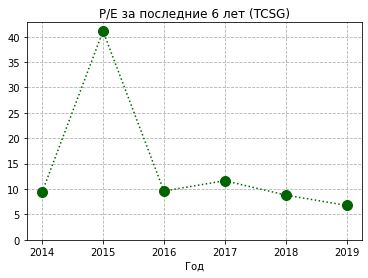

In [16]:
name = "P/E"
data = dt['P/E']
plt.xticks(dt.index, dt.year)
plt.plot( dt.index, data, marker='o', ms=10, label=name, ls=':', c='darkgreen' )
plt.title(f'{name} за последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
plt.ylim(0, None)
plt.grid(ls='--')
plt.savefig('../images/PE.png', dpi=200)

В последние годы P/E держится на довольно низком уровне, что хорошо

### P/BV

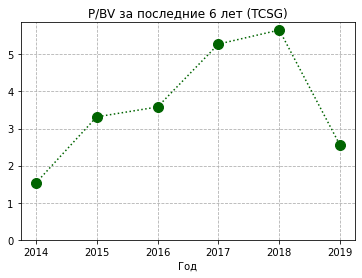

In [17]:
name = "P/BV"
data = dt['P/BV']
plt.xticks(dt.index, dt.year)
plt.plot( dt.index, data, marker='o', ms=10, label=name, ls=':', c='darkgreen' )
plt.title(f'{name} за последние {len(data.dropna())} лет ({company})')
plt.xlabel('Год')
plt.ylim(0, None)
plt.grid(ls='--')
plt.savefig('../images/PBV.png', dpi=200)